# Classification

## Definition



$X_{i\cdot} = (x_{i1},\ldots,x_{im})$ - single observation \
$X = (X_{1\cdot},\ldots,X_{n\cdot})^T = \begin{bmatrix}x_{11}&x_{12}&\cdots &x_{1m}\\
x_{21} & x_{22} &\cdots &x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\ 
x_{n1} & x_{n2} &\cdots &x_{nm}\end{bmatrix}$ - dataset \
$C_1,\ldots,C_k$ - possible classes \
$P\left(C=C_i|X=x\right)=p_i$ - conditional probability / model \
$C = \operatorname{argmax}_{c\in\{C_1,\ldots,C_k\}}{P(c|X=x)}$ - predicted class

In [1]:
import numpy as np

In [2]:
X = np.random.randn(100, 2)
X

array([[ 0.2038289 ,  1.58491169],
       [ 0.51777594, -2.17368551],
       [ 0.10722745,  0.28859815],
       [ 0.07033535, -0.19839787],
       [-2.77281215, -0.60406151],
       [ 0.49486022,  0.78752064],
       [ 0.87016833,  0.41315289],
       [ 1.6902206 , -0.10996605],
       [-0.19887256, -0.90865696],
       [ 1.85278301,  0.40398749],
       [-0.03087094,  1.64369584],
       [-0.69418002, -0.34933887],
       [-0.39058796,  1.24885596],
       [ 0.68497783,  0.8844481 ],
       [-1.46237104,  0.50496734],
       [ 0.89575624, -0.41919746],
       [ 1.13132958, -1.53803106],
       [-1.29575673, -0.44953213],
       [ 1.74789212,  1.05380756],
       [-2.29068508,  0.27228454],
       [-0.3252867 , -2.17805481],
       [-1.58508276, -0.30120114],
       [ 0.46202276, -1.09275761],
       [-1.59934199, -0.0056523 ],
       [ 0.07891687, -1.12337244],
       [ 0.44617404, -0.88967026],
       [ 1.24006239, -0.33966063],
       [ 0.25039363,  0.66016481],
       [ 0.1550405 ,

In [3]:
noise = np.random.randn(100)
noise

array([-1.19653922e+00,  4.92511142e-01,  1.32151619e+00,  3.57092353e-01,
        1.78264932e-01,  1.12952729e+00,  3.53713995e-01, -2.24433126e+00,
       -2.26119413e-01, -1.40299212e+00,  1.88757380e+00, -3.18868581e-01,
        1.41356152e+00,  3.53954203e+00,  6.15923702e-01,  1.54559546e+00,
       -7.83989825e-01,  1.29889301e+00,  1.62028631e+00,  8.93350584e-01,
        7.22655799e-04,  8.97537382e-01,  5.64935327e-01, -3.44458458e-01,
        1.56784869e+00, -1.24866132e+00,  2.23031901e-01,  1.47294006e+00,
       -1.21175438e+00,  7.36123252e-01,  1.12817836e+00, -2.23513621e-02,
       -9.26863644e-01, -1.28786089e+00,  8.93738284e-01, -1.34145002e+00,
        5.13449713e-01, -1.24203536e-01,  1.38314108e+00,  5.52612543e-01,
       -1.68069475e-01, -3.53568368e-01, -3.94578556e-02,  2.20390429e+00,
        1.40837170e+00,  1.06932253e+00,  6.09675669e-01, -7.95567842e-01,
        7.34239285e-01,  2.05841202e-01, -4.32604011e-01,  1.86526803e-01,
       -4.02616614e-02,  

In [14]:
y = np.sum(X, axis=-1) + noise > 0
y = y.astype(int)
y

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0])

In [15]:
import pandas as pd

In [16]:
df = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1], 'y': y})
df.head()

,x1,x2,y
0,0.203829,1.584912,1
1,0.517776,-2.173686,0
2,0.107227,0.288598,1
3,0.070335,-0.198398,1
4,-2.772812,-0.604062,0


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

<AxesSubplot:xlabel='x1', ylabel='x2'>

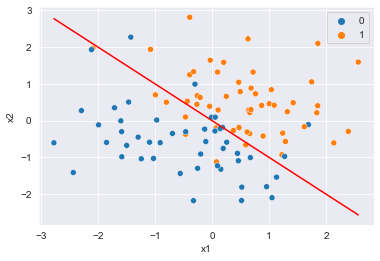

In [21]:
neg_df = df.copy()
neg_df['negx1'] = -df.x1
sns.scatterplot(data=df, x='x1', y='x2', hue='y')
sns.lineplot(data=neg_df, x='x1', y='negx1', color='r')

y = x1 + x2 > 0 -> 1 -> x2 > -x1 -> 1
y = x1 + x2 < 0 -> 0 -> x2 < -x1 < 0

## Training and Test datasets

![](media\dataset.webp)

In [23]:
val_frac = .15
test_frac = .1
test = df.sample(frac = test_frac)
train = df.drop(test.index)
val = train.sample(frac = val_frac / (1 - test_frac))
train = train.drop(val.index)
train.shape, val.shape, test.shape

((75, 3), (15, 3), (10, 3))

In [24]:
def plot_data(data, name):
    neg_df = data.copy()
    neg_df['negx1'] = -neg_df.x1
    sns.scatterplot(data=data, x='x1', y='x2', hue='y')
    sns.lineplot(data=neg_df, x='x1', y='negx1', color='r')
    plt.title(name)
    plt.show()

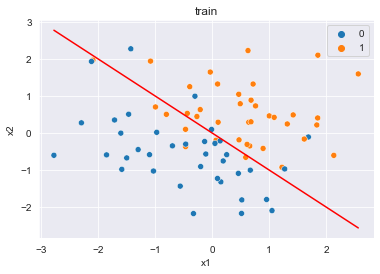

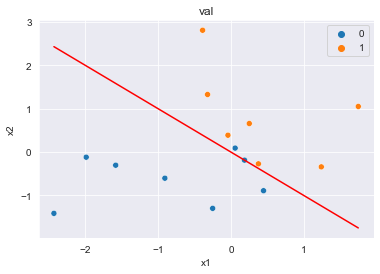

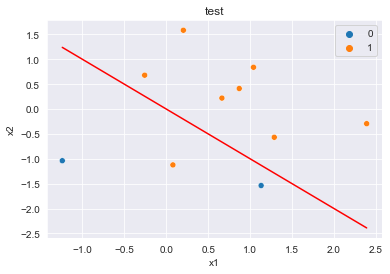

In [25]:
plot_data(train, 'train')
plot_data(val, 'val')
plot_data(test, 'test')

## Representation

### Binary

$c\in\left\{C_1,C_2\right\}\Rightarrow \tilde{C_1}=0,\:\tilde{C_2}=1$ \
$\hat{p}=P(c=C_2|X=x)$ \
$\hat{c}=\begin{cases}C_1,&\hat{p}\le\frac{1}{2}\\C_2,&\hat{p}>\frac{1}{2}&\end{cases}$

### Multiclass

$c\in\{C_1,\ldots,C_k\}\Rightarrow \tilde{C_1}=(1,0,\ldots,0),\:\tilde{C_2}=(0,1,\ldots,0),\:\ldots,\:\tilde{C_k}=(0,0,\ldots,1)$ - one hot encoding \
$\hat{p_i}=P(c=C_i|X=x)$ \
$\hat{p}=(p_1,p_2,\ldots,p_k)$ \
$\hat{I}=\operatorname{argmax}_{i\in\{1,\ldots,k\}}{p_i}$ \
$\hat{c}=C_{\hat{I}}$

## scikit-learn
[![](media\sklearn.png)](https://scikit-learn.org/stable/)

In [26]:
!pip install scikit-learn

## Algorithms

![](media\classifiers.png)

In [27]:
train_x, train_y = train[['x1', 'x2']], train['y']
val_x, val_y = val[['x1', 'x2']], val['y']
test_x, test_y = test[['x1', 'x2']], test['y']

### Logistic Regression

$$\forall_{i\in\{1,\ldots,n\}}\:p_i=\frac{1}{1+e^{-\left(\beta_0+\beta_1x_i1+\ldots+\beta_mx_{im}\right)}}=\frac{1}{1+e^{-X_{i\cdot}\beta}}$$
$X=\begin{bmatrix}x_{11}&x_{12}&\cdots &x_{1m}\\
x_{21} & x_{22} &\cdots &x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\ 
x_{n1} & x_{n2} &\cdots &x_{nm}\end{bmatrix}$ \
$\beta=(\beta_0,\ldots,\beta_m)^T$
![](media\logistic_regression.png)

$y_i\in\{0,1\}$ - real "class" of ith observation \
$L=\sum_i^n{\left(\hat{p_i}(1-y_i)+\left(1-\hat{p_i}\right)y_i\right)}$ - loss function \
$\hat{\beta}=\operatorname{argmin}_{\beta}{L}$

#### How to minimize the LOSS?
#### Gradient Descent!
![](media\gradient_descent.png)
More about Gradient Descent next time

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logistic = LogisticRegression(penalty='none')
logistic.fit(train_x, train_y)

LogisticRegression(penalty='none')

In [30]:
def model_plane(model, points=100):
    
    x = np.array(train_x)
    x1 = np.array([np.linspace(min(x[:, 0]), max(x[:, 0]), points) for _ in range(points)]).flatten()
    x2 = np.array([np.linspace(min(x[:, 1]), max(x[:, 1]), points) for _ in range(points)]).T.flatten()
    y = model.predict_proba(np.stack((x1, x2)).T)
    sns.scatterplot(x=x1, y=x2, hue=y[:, 1])
    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=np.array(train_y))

C:\Users\mikol\anaconda3\envs\DIY\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


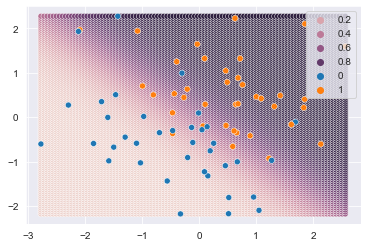

In [31]:
model_plane(logistic)

In [32]:
logistic.predict([[-1, 1], [1, -1]])

C:\Users\mikol\anaconda3\envs\DIY\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 0])

In [34]:
logistic.score(train_x, train_y)

0.84

In [33]:
logistic.score(val_x, val_y)

0.8666666666666667

In [35]:
logistic.score(test_x, test_y)

0.9

### Regularized logistic regression
$$L=\sum_i^n{\left(\hat{p_i}(1-y_i)+\left(1-\hat{p_i}\right)y_i\right)}+\alpha\|\beta\|_l$$

In [39]:
regular = LogisticRegression(penalty='l2', C=.01)
regular.fit(train_x, train_y)

LogisticRegression(C=0.01)

C:\Users\mikol\anaconda3\envs\DIY\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


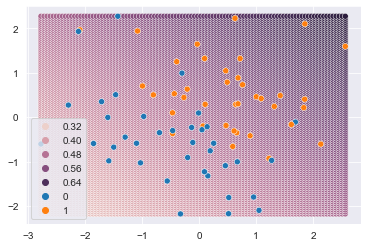

In [40]:
model_plane(regular)

In [42]:
regular.score(val_x, val_y)

0.8666666666666667

In [43]:
regular.predict([[-1, 1], [1, -1]])

C:\Users\mikol\anaconda3\envs\DIY\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 1])

In [44]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

<AxesSubplot:>

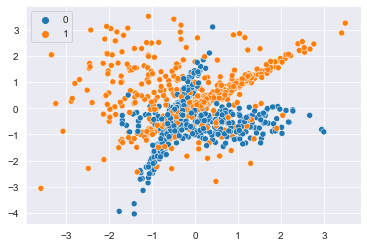

In [46]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_repeated=0, class_sep=.5, random_state=42)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [47]:
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=.8, stratify=y)

In [48]:
regular = LogisticRegression(penalty='l2', C=.01)
regular.fit(train_x, train_y)

LogisticRegression(C=0.01)

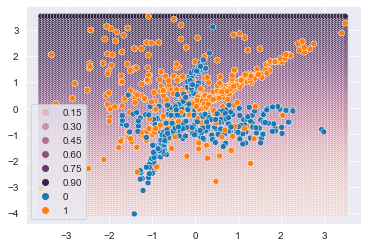

In [49]:
model_plane(regular)

In [50]:
regular.score(test_x, test_y)

0.705

## K-Nearest Neighbours

$x$ - data to be predicted \
$d_i = \|x-X_{i\cdot}\|$ - distance from observed data \
$c_i=y_i|d_{i:n}$ - ith nearest class \
$NN=(c_1,\ldots,c_k)$ - nearest neighbours \
$\hat{c}=\operatorname{argmax}_{k\in\{1,\ldots,K\}}{\sum_i^k{1_{c_i=k}}}$ \
![](media\knn.png)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=20)

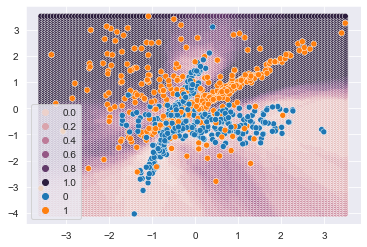

In [61]:
model_plane(knn)

In [62]:
knn.score(test_x, test_y)

0.815

### Support Vector Machine

![](media\svm.webp)
$w^TX_{i\cdot}-b=0$ - decision boundary \
$y_i\in\{-1,1\}$ \
$y_i(w^TX_{i\cdot}-b)\ge1$ - constraint \
$w=\operatorname{argmax}_{w^{*}}{\frac{2}{\left\|w^{*}\right\|}}$ - margin size

### Soft margins
$$L=\lambda\|w\|^2+\frac{1}{n}\sum_i^n{\max{\left(0,1-y_i\left(w^TX_{i\cdot}-b\right)\right)}}$$
$w=\operatorname{argmin}_{w^{*}}{L}$

In [63]:
from sklearn.svm import SVC

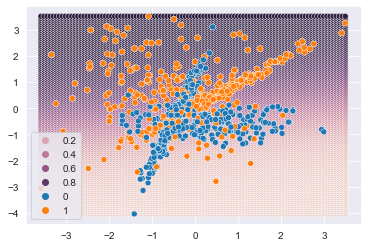

In [66]:
svm = SVC(kernel='linear', C=.01, probability=True)
svm.fit(train_x, train_y)
model_plane(svm)

In [68]:
svm.score(test_x, test_y)

0.72

### Kernel trick
![](media\kernel.ppm)
$k(X_{i\cdot},X_{j\cdot})=\phi(X_{i\cdot})\phi(X_{j\cdot})$ - kernel \
$w=\sum_i^n{c_iy_i\phi(X_{i\cdot})}$

![](media\kernels_formula.png)
![](media\kernels_plot.png)

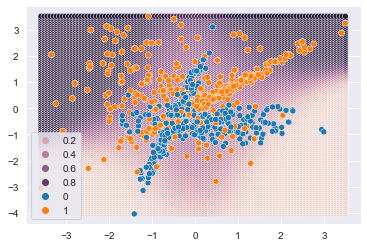

In [75]:
rbf = SVC(kernel='poly', C=100, gamma=1, probability=True).fit(train_x, train_y)
model_plane(rbf)

In [74]:
rbf.score(test_x, test_y)

0.815

## Decision Trees

![](media\decision_tree.png)

$R_p$ - parent node \
$R_l,R_r$ - left and right nodes \
$S:R_p\rightarrow \{R_l,R_r\}$ - split \
$p_i^{(a)}=P(c=C_i|X\in R_a)$ - probability of ith class in $R_a$ node \
$G(R_a)=1-\sum_i^K{\left(p_i^{(a)}\right)^2}$ - Gini Impurity \
$E(R_a)=-\sum_i^K{p_i\log{p_i}}$ - Entropy \
$IG(S)=f(R_p)-\left(P(R_l)f(R_l)+P(R_r)f(R_p)\right);\: f(x)=G(x)\lor f(x)=E(x)$ - Information Gain \
$S=\operatorname{argmax}_{S^{*}}IG\left(S^{*}\right)$

In [76]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [77]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)

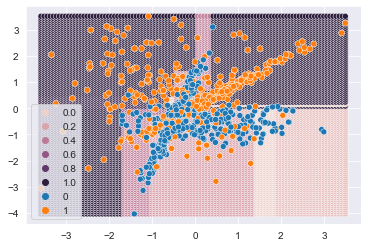

In [78]:
dt.fit(train_x, train_y)
model_plane(dt)

In [80]:
dt.score(test_x, test_y)

0.755

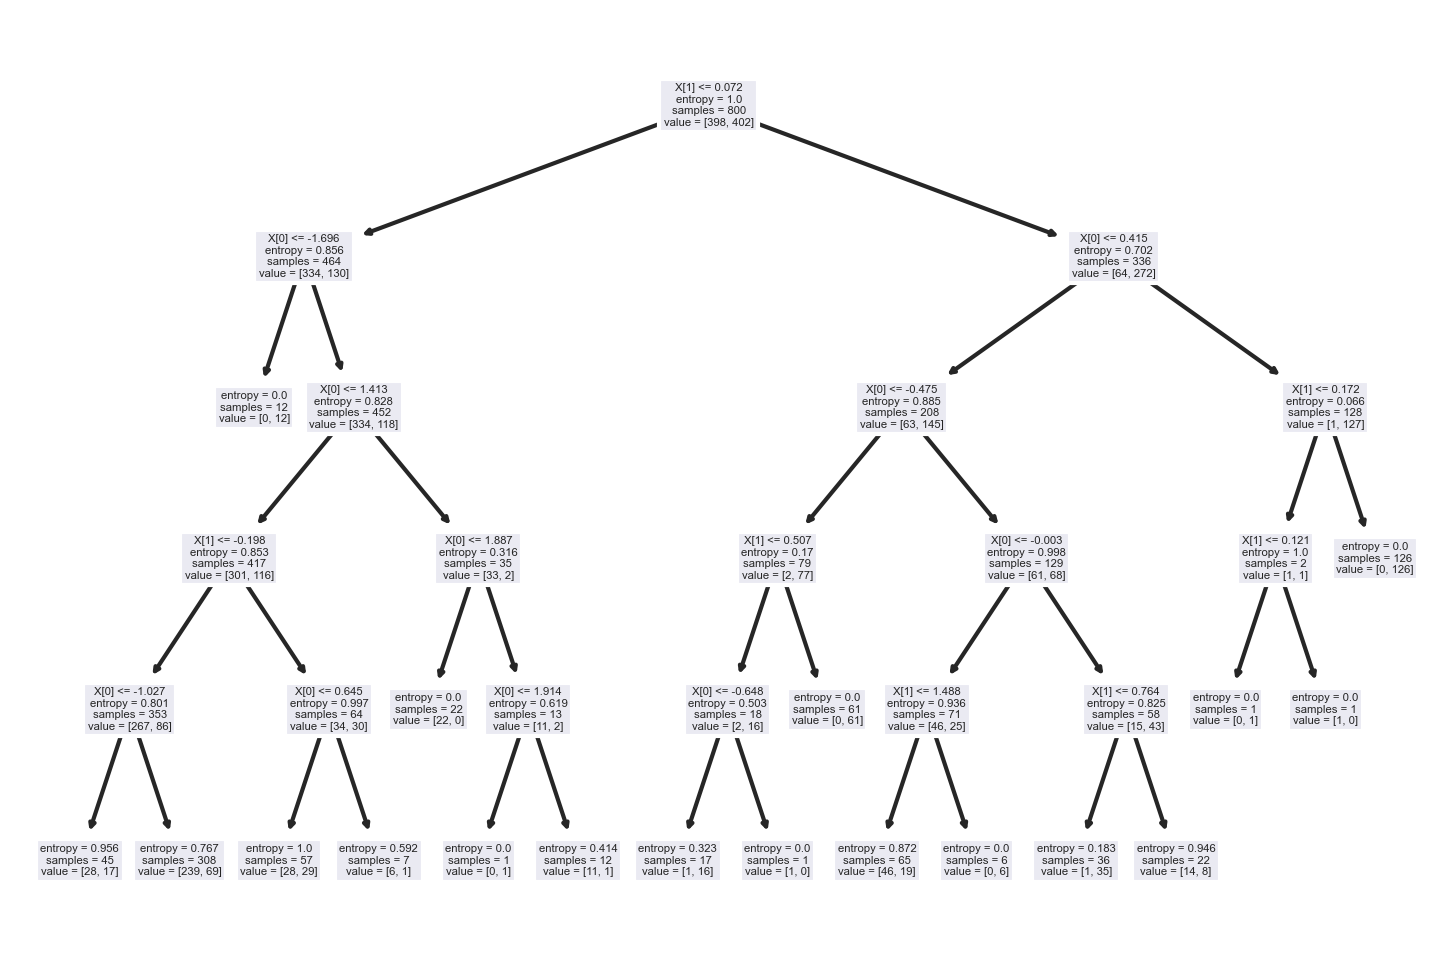

In [82]:
fig, axes = plt.subplots(dpi=300)
plot_tree(dt)
plt.show()

## Naive Bayes
![](media\bayes.png)
$$P(c=C_i|X=x)=\frac{P(c=C_i,X=x)}{P(X)}\propto P(c=C_i,X=x)=\\=P(c=C_i)P(X_{\cdot 1}=x_1,\ldots X_{\cdot m}=x_m|c=C_i)P(X_{\cdot 1}=x_1|X_{\cdot 2},\ldots,X_{\cdot m}=x_m,c=C_i)\ldots P(X_{\cdot m}=x_m|c=C_i)$$

$$P(X_{\cdot j}=x_j|X_{\cdot -j}=x_{-j},c=C_i)=P(X_{\cdot j}=x_j|c=C_i)$$

$$P(c=C_i|X=x)=P(c=C_i)\prod_{j=1}^m{P(X_{\cdot j}=x_j|c=C_i)}$$

In dependence of data type, different likelihood functions are applied

### Gaussian (continous variable)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/8967b34cca6aeffe1820bc5f2624cee311dccaeb)

### Bernoulli (binary variable)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/2b23b8affe1fa31b1ce499d5d2944d9763ff2e6e)

### Multinomial (categorical variable)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/8967b34cca6aeffe1820bc5f2624cee311dccaeb)

In [83]:
from sklearn.naive_bayes import GaussianNB

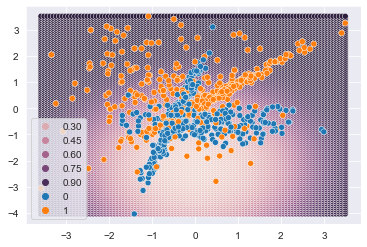

In [84]:
bayes = GaussianNB().fit(train_x, train_y)
model_plane(bayes)

In [85]:
bayes.score(test_x, test_y)

0.695

### Probability Calibration
[![](media\calibration.png)](https://scikit-learn.org/stable/modules/calibration.html)

### Others
[Gaussian Processes](https://scikit-learn.org/stable/modules/gaussian_process.html) \
[LDA/QDA](https://scikit-learn.org/stable/modules/lda_qda.html)

## Metrics
![](media\confusion_matrix.jpeg) \
$F_{\beta}=\left(1+\beta^2\right)\frac{\operatorname{precision}\cdot\operatorname{recall}}{\beta^2\operatorname{precision}+\operatorname{recall}}$ \
$F_1=2\frac{\operatorname{precision}\cdot\operatorname{recall}}{\operatorname{precision}+\operatorname{recall}}$

### Multiclassification as binary

#### OvO
$P^{(i,j)}(c=C_i|X=x)=1-P^{(i,j)}(c=C_j|X=x)\:\forall_{i\neq j}$ - $\frac{K(K-1)}{2}$ models \
$\hat{c}^{(i,j)}=\begin{cases}C_j,&P^{(i,j)}(c=C_i|X=x)\le\frac{1}{2}\\C_i,&P^{(i,j)}(c=C_i|X=x)>\frac{1}{2}\end{cases}$ \
$\hat{c}=\operatorname{argmax}_{k\in\{1,\ldots,K\}}\sum_{i\neq j}{1_{\hat{c}^{(i,j)}=C_k}}$
![](media\ovo.png)

#### OvR
$P^{(i)}(c=C_i|X=x)=1-P^{(i)}(c\neq C_i|X=x)\:\forall_{i\in\{1,\ldots,K\}}$ - $K$ models \
$\hat{c}=\operatorname{argmax}_{i\in\{1,\ldots,K\}}{P^{(i)}(c=C_i|X=x)}$
![](media\ovr.png)

In [86]:
def predict_plane(X, y_true, model, points=100):
    
    x1 = np.array([np.linspace(min(X[:, 0]), max(X[:, 0]), points) for _ in range(points)]).flatten()
    x2 = np.array([np.linspace(min(X[:, 1]), max(X[:, 1]), points) for _ in range(points)]).T.flatten()
    y = model.predict(np.stack((x1, x2)).T)
    sns.scatterplot(x=x1, y=x2, hue=y)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_true)

In [ ]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

## ROC/AUC

In [29]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay